In [1]:
import numpy as np
import qiskit as qkt
import time
#from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute, transpile
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
#from qiskit.compiler import transpile
from qiskit_aer.aerprovider import QasmSimulator, AerSimulator
from qiskit_aer import Aer

backend = QasmSimulator(method='matrix_product_state')
#backend = QasmSimulator(method='automatic') Link: https://qiskit.github.io/qiskit-aer/stubs/qiskit_aer.QasmSimulator.html
backend2 = AerSimulator()

In [2]:
def qc_inp(qc, r_inp, binary_inp, n):
    for i in range(n):
        if (binary_inp[i] == "1"):
            qc.x(r_inp[i])

In [3]:
def key_gen2(qc, qr, round, n):
    for i in range(round):        
        qc.cx(qr[65],qr[92])
        qc.ccx(qr[90],qr[91],qr[92])
        qc.cx(qr[170],qr[92])
        qc.swap(qr[92],t[0])
        
        qc.cx(qr[161],qr[176])
        qc.ccx(qr[174],qr[175],qr[176])
        qc.cx(qr[263],qr[176])
        qc.swap(qr[176],t[1])
        
        qc.cx(qr[242],qr[287])
        qc.ccx(qr[285],qr[286],qr[287])
        qc.cx(qr[68],qr[287])
        qc.swap(qr[287],t[2])

        for j in range(287,176,-1):
            if j == 177:
                qc.swap(qr[177], t[1])
            else:
                qc.swap(qr[j], qr[j-1])

        for j in range(176,92,-1):
            if j == 93:
                qc.swap(qr[93], t[0])
            else:
                qc.swap(qr[j], qr[j-1])
        
        for j in range(92,-1,-1):
            if j == 0:
                qc.swap(qr[0], t[2])
            else:
                qc.swap(qr[j], qr[j-1])


    """ Key Stream Generation """
    for i in range(n):
        
        qc.cx(qr[65],qr[92])
        qc.swap(qr[92],t[0])
        
        qc.cx(qr[161],qr[176])
        qc.swap(qr[176],t[1])
        
        qc.cx(qr[242],qr[287])
        qc.swap(qr[287],t[2])
        
        qc.cx(t[0],z[i])
        qc.cx(t[1],z[i])
        qc.cx(t[2],z[i])
        
        qc.ccx(qr[90],qr[91],t[0]) 
        qc.cx(qr[170],t[0]) 
        
        qc.ccx(qr[174],qr[175],t[1]) 
        qc.cx(qr[263],t[1]) 
        
        qc.ccx(qr[285],qr[286],t[2]) 
        qc.cx(qr[68],t[2]) 
        
        for j in range(287,176,-1):
            if j == 177:
                qc.swap(qr[177], t[1])
            else:
                qc.swap(qr[j], qr[j-1])

        for j in range(176,92,-1):
            if j == 93:
                qc.swap(qr[93], t[0])
            else:
                qc.swap(qr[j], qr[j-1])
        
        for j in range(92,-1,-1):
            if j == 0:
                qc.swap(qr[0], t[2])
            else:
                qc.swap(qr[j], qr[j-1])
                

def rev_key_gen2(qc, qr, round, n):

    for i in range(n):        
        for j in range(0,93,1): 
            if j == 0:
                qc.swap(qr[0], t[2])
            else:
                qc.swap(qr[j], qr[j-1])
                
        for j in range(93,177,1): 
            if j == 93:
                qc.swap(qr[93], t[0])
            else:
                qc.swap(qr[j], qr[j-1])
        
        for j in range(177,288,1): 
            if j == 177:
                qc.swap(qr[177], t[1])
            else:
                qc.swap(qr[j], qr[j-1])
        
        qc.cx(qr[68],t[2]) 
        qc.ccx(qr[285],qr[286],t[2]) 
        
        qc.cx(qr[263],t[1]) 
        qc.ccx(qr[174],qr[175],t[1]) 
        
        qc.cx(qr[170],t[0]) 
        qc.ccx(qr[90],qr[91],t[0]) 
        
        
        qc.cx(t[2],z[n-1-i])
        qc.cx(t[1],z[n-1-i])
        qc.cx(t[0],z[n-1-i])
        
        qc.swap(qr[287],t[2])
        qc.cx(qr[242],qr[287])
        
        qc.swap(qr[176],t[1])
        qc.cx(qr[161],qr[176])
        
        qc.swap(qr[92],t[0])
        qc.cx(qr[65],qr[92])
            
    
    for i in range(round):         
        for j in range(0,93,1):
            if j == 0:
                qc.swap(qr[0], t[2])
            else:
                qc.swap(qr[j], qr[j-1])
        
        for j in range(93,177,1):
            if j == 93:
                qc.swap(qr[93], t[0])
            else:
                qc.swap(qr[j], qr[j-1])
        
        for j in range(177,288,1):
            if j == 177:
                qc.swap(qr[177], t[1])
            else:
                qc.swap(qr[j], qr[j-1])
        
        qc.swap(qr[287],t[2])
        qc.cx(qr[68],qr[287])
        qc.ccx(qr[285],qr[286],qr[287])
        qc.cx(qr[242],qr[287])
        
        qc.swap(qr[176],t[1])
        qc.cx(qr[263],qr[176])
        qc.ccx(qr[174],qr[175],qr[176])
        qc.cx(qr[161],qr[176])
        
        qc.swap(qr[92],t[0])
        qc.cx(qr[170],qr[92])
        qc.ccx(qr[90],qr[91],qr[92])
        qc.cx(qr[65],qr[92])
        

In [4]:
def my_oracle(qc, r_key, r_ancilla, rev_ks, z, r_output, n, rnd, x):
    #Preparing key in a superposition state
    for i in range(n): #For loading partial key
        qc.cx(r_key[i], qr[36+i])
    key_gen2(qc, qr, rnd, n+x)
    
    #Checking whether the generated key stream is equal to the given key stream
    for i in range(n+x):
        qc.cx(rev_ks[i], r_ancilla[i])
        qc.cx(z[i], r_ancilla[i]) 
        qc.x(r_ancilla[i])
        
    #Set 'output' bit if the key stream is matched
    qc.mcx(r_ancilla, r_output)
    
    qc.barrier()
    
    #Uncompute to reset ancilla & key stream qubits
    for i in range(n+x):
        qc.x(r_ancilla[i])
        qc.cx(rev_ks[i], r_ancilla[i])
        qc.cx(z[i], r_ancilla[i]) 
    qc.barrier()
    
    rev_key_gen2(qc, qr, rnd, n+x)
    for i in range(n):
        qc.cx(r_key[i], qr[36+i])
    qc.barrier()
        

In [5]:
#The diffuser function is available in Qiskit; Courtesey: https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/grover.ipynb
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    #nqubits = nqubits - 2
    #Apply transformation |s> -> |00...0> (H gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    #Apply transformation |00...0> -> |11...1> (X gates)
    for qubit in range(nqubits):
        qc.x(qubit)    
    #Do multi-controlled Z gate
    qc.h(nqubits - 1)
    qc.mcx(list(range(nqubits - 1)), nqubits - 1) #multi-controlled Toffoli; replaced with qc.mct(list(range(nqubits - 1)), nqubits - 1)
    qc.h(nqubits - 1)
    #Apply transformation |11...1> -> |00...0> (X gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    #Apply transformation |00...0> -> |s> (H gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    #We will return the diffuser as a gate
    U_s = qc.to_gate()
    #U_s.name = "U$_s$"
    return U_s
    

In [6]:
n = 4 #No. of key qubits to recover
rnd = 200 #200
x = 0 #x denotes the additional length of the key stream, other than key length, n. If key stream length is n+2, then x = 2
qr = QuantumRegister(288) #test Quantum Register is useless here, just used for any test purpose
t = QuantumRegister(3)
z = QuantumRegister(n+x)
r_key = QuantumRegister(n, 'k')
r_output = QuantumRegister(1, name = 'o')
rev_ks = QuantumRegister(n+x, 'c')
r_ancilla = QuantumRegister(n+x, 'a')

r_class = ClassicalRegister(n)

qc = QuantumCircuit(qr,t,z, r_key, rev_ks, r_ancilla, r_output, r_class)

#loading known key stream
ks_actual = '1100'       
qc_inp(qc, rev_ks, ks_actual, n+x) #Thus we get the key stream in rev_ks; actual ks='010'

for i in range(n):
    qc.h(r_key[i])

### Initialization of s array ###
key_0_35 = '000000010010001101000101011001111000' #len=36
key_40_79 = '1010101111001101111011110001001000110100' #len=41
for i in range(36): #For loading Key
    if (key_0_35[i] == "1"):
        qc.x(qr[i+0]) 
for i in range(40): #For loading Key
    if (key_40_79[i] == "1"):
        qc.x(qr[i+40])

iv = '00000001001000110100010101100111100010011010101111001101111011110001001000110100'
for i in range(80): #For loading IV
    if (iv[i] == "1"):
        qc.x(qr[i+93]) 

qc.x(qr[285])
qc.x(qr[286])
qc.x(qr[287])
### End of Initialization ###

#Preparing output qubit
qc.x(r_output)
qc.h(r_output)
qc.barrier()

start = time.process_time()
#First Iteration
my_oracle(qc, r_key, r_ancilla, rev_ks, z, r_output, n, rnd, x)
qc.barrier()
qc.append(diffuser(n), r_key)
#qc.barrier()

#Second Iteration
"""my_oracle(qc, r_key, r_ancilla, rev_ks, z, r_output, n, rnd, x)
qc.barrier()
qc.append(diffuser(n), r_key)
qc.barrier()"""


qc.measure(r_key, r_class) 

In [7]:
n_o_shots = 1024

#tcirc = transpile(qc, backend2)
result = backend.run(qc.decompose(reps=2), shots=n_o_shots).result()
print (result.get_counts())
counts = result.get_counts() #counts = result.get_counts(0)
b, c = max(counts.items(), key=lambda x: x[1])
print("Key is :", b[::-1], "with probability =", c/n_o_shots, "and count =", c)
print(time.process_time() - start)
print("Circuit depth: ", qc.depth())

{'0010': 31, '1111': 30, '1100': 41, '1001': 31, '0101': 36, '1110': 27, '0111': 38, '0011': 33, '1011': 41, '0000': 30, '0001': 44, '1101': 36, '1000': 494, '0110': 40, '0100': 45, '1010': 27}
Key is : 0001 with probability = 0.482421875 and count = 494
6786.017589229001
Circuit depth:  39757


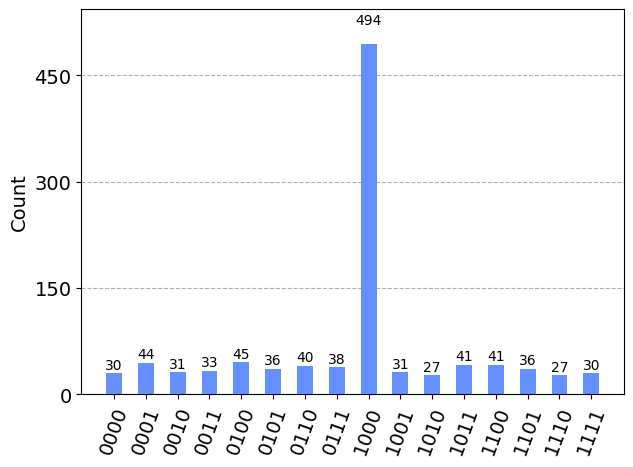

In [8]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)